# Hunter Klinglesmith
# Do Directors and/or their actors have the biggest influence on movie success?

In [253]:
import pandas as pd

In [254]:
%run clean_data.py
%run main.ipynb

$50,000 in 1960 is equivalent to $510969.80 in 2025.


In [255]:
filepath = 'Resources/imdb_all_years.csv'

df = pd.read_csv("Resources/cleaned_data.csv")
df.drop(['Movie Link', 'Duration', 'writers', 'genres', 'countries_origin', 'filming_locations', 'production_companies', 'Languages', 'release_date'], axis=1, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,Swiss Family Robinson,1960,Approved,7.1,19K,5000000.0,40357287.0,40356000.0,NaN,['Ken Annakin'],"['John Mills', 'Dorothy McGuire', 'James MacAr...",0,0,0
1,Psycho,1960,R,8.5,741K,806947.0,32066835.0,32000000.0,NaN,['Alfred Hitchcock'],"['Anthony Perkins', 'Janet Leigh', 'Vera Miles']",0,14,4
2,The Apartment,1960,Approved,8.3,204K,3000000.0,18778738.0,18600000.0,NaN,['Billy Wilder'],"['Jack Lemmon', 'Shirley MacLaine', 'Fred MacM...",0,8,0
3,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
4,The Pusher,1960,Not Rated,6.2,168,NaN,1656.0,1656.0,1656.0,['Gene Milford'],"['Kathy Carlyle', 'Robert Lansing', 'Felice Or...",0,0,0


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  18250 non-null  object 
 1   Year                   18250 non-null  int64  
 2   MPA                    16961 non-null  object 
 3   Rating                 18227 non-null  float64
 4   Votes                  18227 non-null  object 
 5   budget                 9190 non-null   float64
 6   grossWorldWide         12616 non-null  float64
 7   gross_US_Canada        12568 non-null  float64
 8   opening_weekend_Gross  11219 non-null  float64
 9   directors              18250 non-null  object 
 10  stars                  18250 non-null  object 
 11  wins                   18250 non-null  int64  
 12  nominations            18250 non-null  int64  
 13  oscars                 18250 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 1.9+ 

In [257]:
df.dropna(inplace=True)
df.isna().sum()

Title                    0
Year                     0
MPA                      0
Rating                   0
Votes                    0
budget                   0
grossWorldWide           0
gross_US_Canada          0
opening_weekend_Gross    0
directors                0
stars                    0
wins                     0
nominations              0
oscars                   0
dtype: int64

In [258]:
df.head(5)

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
3,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
176,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0
177,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0
178,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0
353,Lawrence of Arabia,1962,PG,8.3,324K,15000000.0,45763719.0,45306425.0,20846.0,['David Lean'],"[""Peter O'Toole"", 'Alec Guinness', 'Anthony Qu...",0,14,0


In [259]:
df.reset_index(drop=True, inplace=True)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0
4,Lawrence of Arabia,1962,PG,8.3,324K,15000000.0,45763719.0,45306425.0,20846.0,['David Lean'],"[""Peter O'Toole"", 'Alec Guinness', 'Anthony Qu...",0,14,0


In [260]:
df['Profitability Ratio'] = df['grossWorldWide'] / df['budget']
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0,0.153915
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0,53.970003
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0,7.355926
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0,57.411874
4,Lawrence of Arabia,1962,PG,8.3,324K,15000000.0,45763719.0,45306425.0,20846.0,['David Lean'],"[""Peter O'Toole"", 'Alec Guinness', 'Anthony Qu...",0,14,0,3.050915


In [261]:
# Use the adjust_for_inflation function to adjust the grossWorldWide column for inflation by getting the year of the movie and the grossWorldWide value
df['grossWorldWideAdjusted'] = df.apply(lambda x: x['grossWorldWide'] if x['Year'] >= 2023 else adjust_for_inflation(x['grossWorldWide'], int(x['Year']), 2023, cpi_data), axis=1)
df.head()

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,Spartacus,1960,PG-13,7.9,146K,12000000.0,1846975.0,1830650.0,92162.0,"['Stanley Kubrick', 'Anthony Mann']","['Kirk Douglas', 'Laurence Olivier', 'Jean Sim...",0,11,0,0.153915,1.887497e+07
1,One Hundred and One Dalmatians,1961,G,7.3,187K,4000000.0,215880014.0,144880014.0,2389226.0,"['Clyde Geronimi', 'Hamilton Luske', 'Wolfgang...","['Rod Taylor', 'Betty Lou Gerson', ""J. Pat O'M...",0,0,0,53.970003,2.182800e+09
2,West Side Story,1961,Approved,7.6,123K,6000000.0,44135556.0,44055492.0,207145.0,"['Jerome Robbins', 'Robert Wise']","['Natalie Wood', 'George Chakiris', 'Richard B...",0,11,0,7.355926,4.462621e+08
3,The Exiles,1961,Not Rated,6.6,1.4K,539.0,30945.0,30945.0,8448.0,['Kent Mackenzie'],"['Yvonne Williams', 'Homer Nish', 'Tom Reynolds']",0,0,0,57.411874,3.128902e+05
4,Lawrence of Arabia,1962,PG,8.3,324K,15000000.0,45763719.0,45306425.0,20846.0,['David Lean'],"[""Peter O'Toole"", 'Alec Guinness', 'Anthony Qu...",0,14,0,3.050915,4.573460e+08


In [262]:
average_gross = df['grossWorldWideAdjusted'].mean()
average_gross

137640235.65755117

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6870 entries, 0 to 6869
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   6870 non-null   object 
 1   Year                    6870 non-null   int64  
 2   MPA                     6870 non-null   object 
 3   Rating                  6870 non-null   float64
 4   Votes                   6870 non-null   object 
 5   budget                  6870 non-null   float64
 6   grossWorldWide          6870 non-null   float64
 7   gross_US_Canada         6870 non-null   float64
 8   opening_weekend_Gross   6870 non-null   float64
 9   directors               6870 non-null   object 
 10  stars                   6870 non-null   object 
 11  wins                    6870 non-null   int64  
 12  nominations             6870 non-null   int64  
 13  oscars                  6870 non-null   int64  
 14  Profitability Ratio     6870 non-null   

In [264]:
def expand_lists(df, columns):
    '''
    Expands the specified columns containing lists into separate rows.
    '''
    expanded_list = []
    for i in range(len(df)):
        # Create a copy of the row
        row_copy = df.iloc[i].copy()
        # Create a list of rows to be expanded
        rows_to_expand = [row_copy]
        
        for column in columns:
            # Remove the formatting characters from the cell
            cell = df[column][i].replace('[', '').replace(']', '').replace("'", '').replace('"', '')
            # Split the items in the cell to a list
            cell_list = cell.split(',')

            if cell_list == ['']:
                rows_to_expand = []
                continue
                # cell_list = ['NaN']
            
            # Expand the rows for the current column
            expanded_rows = []
            for item in cell_list:
                for row in rows_to_expand:
                    new_row = row.copy()
                    new_row[column] = item.strip()
                    expanded_rows.append(new_row)
            rows_to_expand = expanded_rows
        
        expanded_list.extend(rows_to_expand)
    
    return pd.DataFrame(expanded_list)


# Directors

In [265]:
# Expand the columns with lists: 'directors'
directors_expanded_df = expand_lists(df, ['directors'])

In [266]:
by_directors_df = pd.DataFrame(directors_expanded_df.value_counts('directors'))
by_directors_df.reset_index(inplace=True)
by_directors_df

,directors,count
0,Woody Allen,36
1,Clint Eastwood,33
2,Steven Spielberg,29
3,Steven Soderbergh,26
4,Ridley Scott,25
...,...,...
3234,Javier Abad,1
3235,Javier Mariscal,1
3236,Jay DiPietro,1
3237,Jay Levey,1


In [267]:
# Drop the directors with fewer than 10 movies
by_directors_df = by_directors_df[by_directors_df['count'] >= 10]
by_directors_df

,directors,count
0,Woody Allen,36
1,Clint Eastwood,33
2,Steven Spielberg,29
3,Steven Soderbergh,26
4,Ridley Scott,25
...,...,...
86,Quentin Tarantino,10
87,Harold Ramis,10
88,Gore Verbinski,10
89,Frank Oz,10


In [268]:
def sum_columns_per_unique(expanded_df, count_df, unique_column, column_to_sum):
    '''
    Sums the values of the specified column for each unique value in the unique_column.
    '''
    unique_list = count_df[unique_column].tolist()

# Dictionary to store the sum for each unique value from the unique_column
    unique_sum = {}

# Loop through all of the directors in the list and get the profitability ratio
    for unique in unique_list:
        unique_sum[unique] = expanded_df.loc[expanded_df[unique_column] == unique][column_to_sum].sum()
    return pd.DataFrame(unique_sum.items(), columns=[unique_column, 'Total ' + column_to_sum])


In [269]:
directors_profitability_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'Profitability Ratio')
directors_profitability_df.head()

,directors,Total Profitability Ratio
0,Woody Allen,62.334087
1,Clint Eastwood,106.293169
2,Steven Spielberg,309.963957
3,Steven Soderbergh,67.205589
4,Ridley Scott,58.257830


In [270]:
# Add the profitability ratio for each director to the dataframe
by_directors_df = by_directors_df.merge(directors_profitability_df, on='directors')
by_directors_df.head()

,directors,count,Total Profitability Ratio
0,Woody Allen,36,62.334087
1,Clint Eastwood,33,106.293169
2,Steven Spielberg,29,309.963957
3,Steven Soderbergh,26,67.205589
4,Ridley Scott,25,58.257830


In [271]:
by_directors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio
13,Robert Rodriguez,18,333.503921
2,Steven Spielberg,29,309.963957
61,James Wan,11,230.041839
31,Kevin Smith,13,182.070137
22,M. Night Shyamalan,15,112.054682


In [272]:
by_directors_df.iloc[:30]

,directors,count,Total Profitability Ratio
13,Robert Rodriguez,18,333.503921
2,Steven Spielberg,29,309.963957
61,James Wan,11,230.041839
31,Kevin Smith,13,182.070137
22,M. Night Shyamalan,15,112.054682
1,Clint Eastwood,33,106.293169
38,Chris Columbus,13,90.233541
37,Richard Linklater,13,87.621748
17,Robert Zemeckis,17,81.351237
40,John Landis,13,81.279731


<Axes: xlabel='directors'>

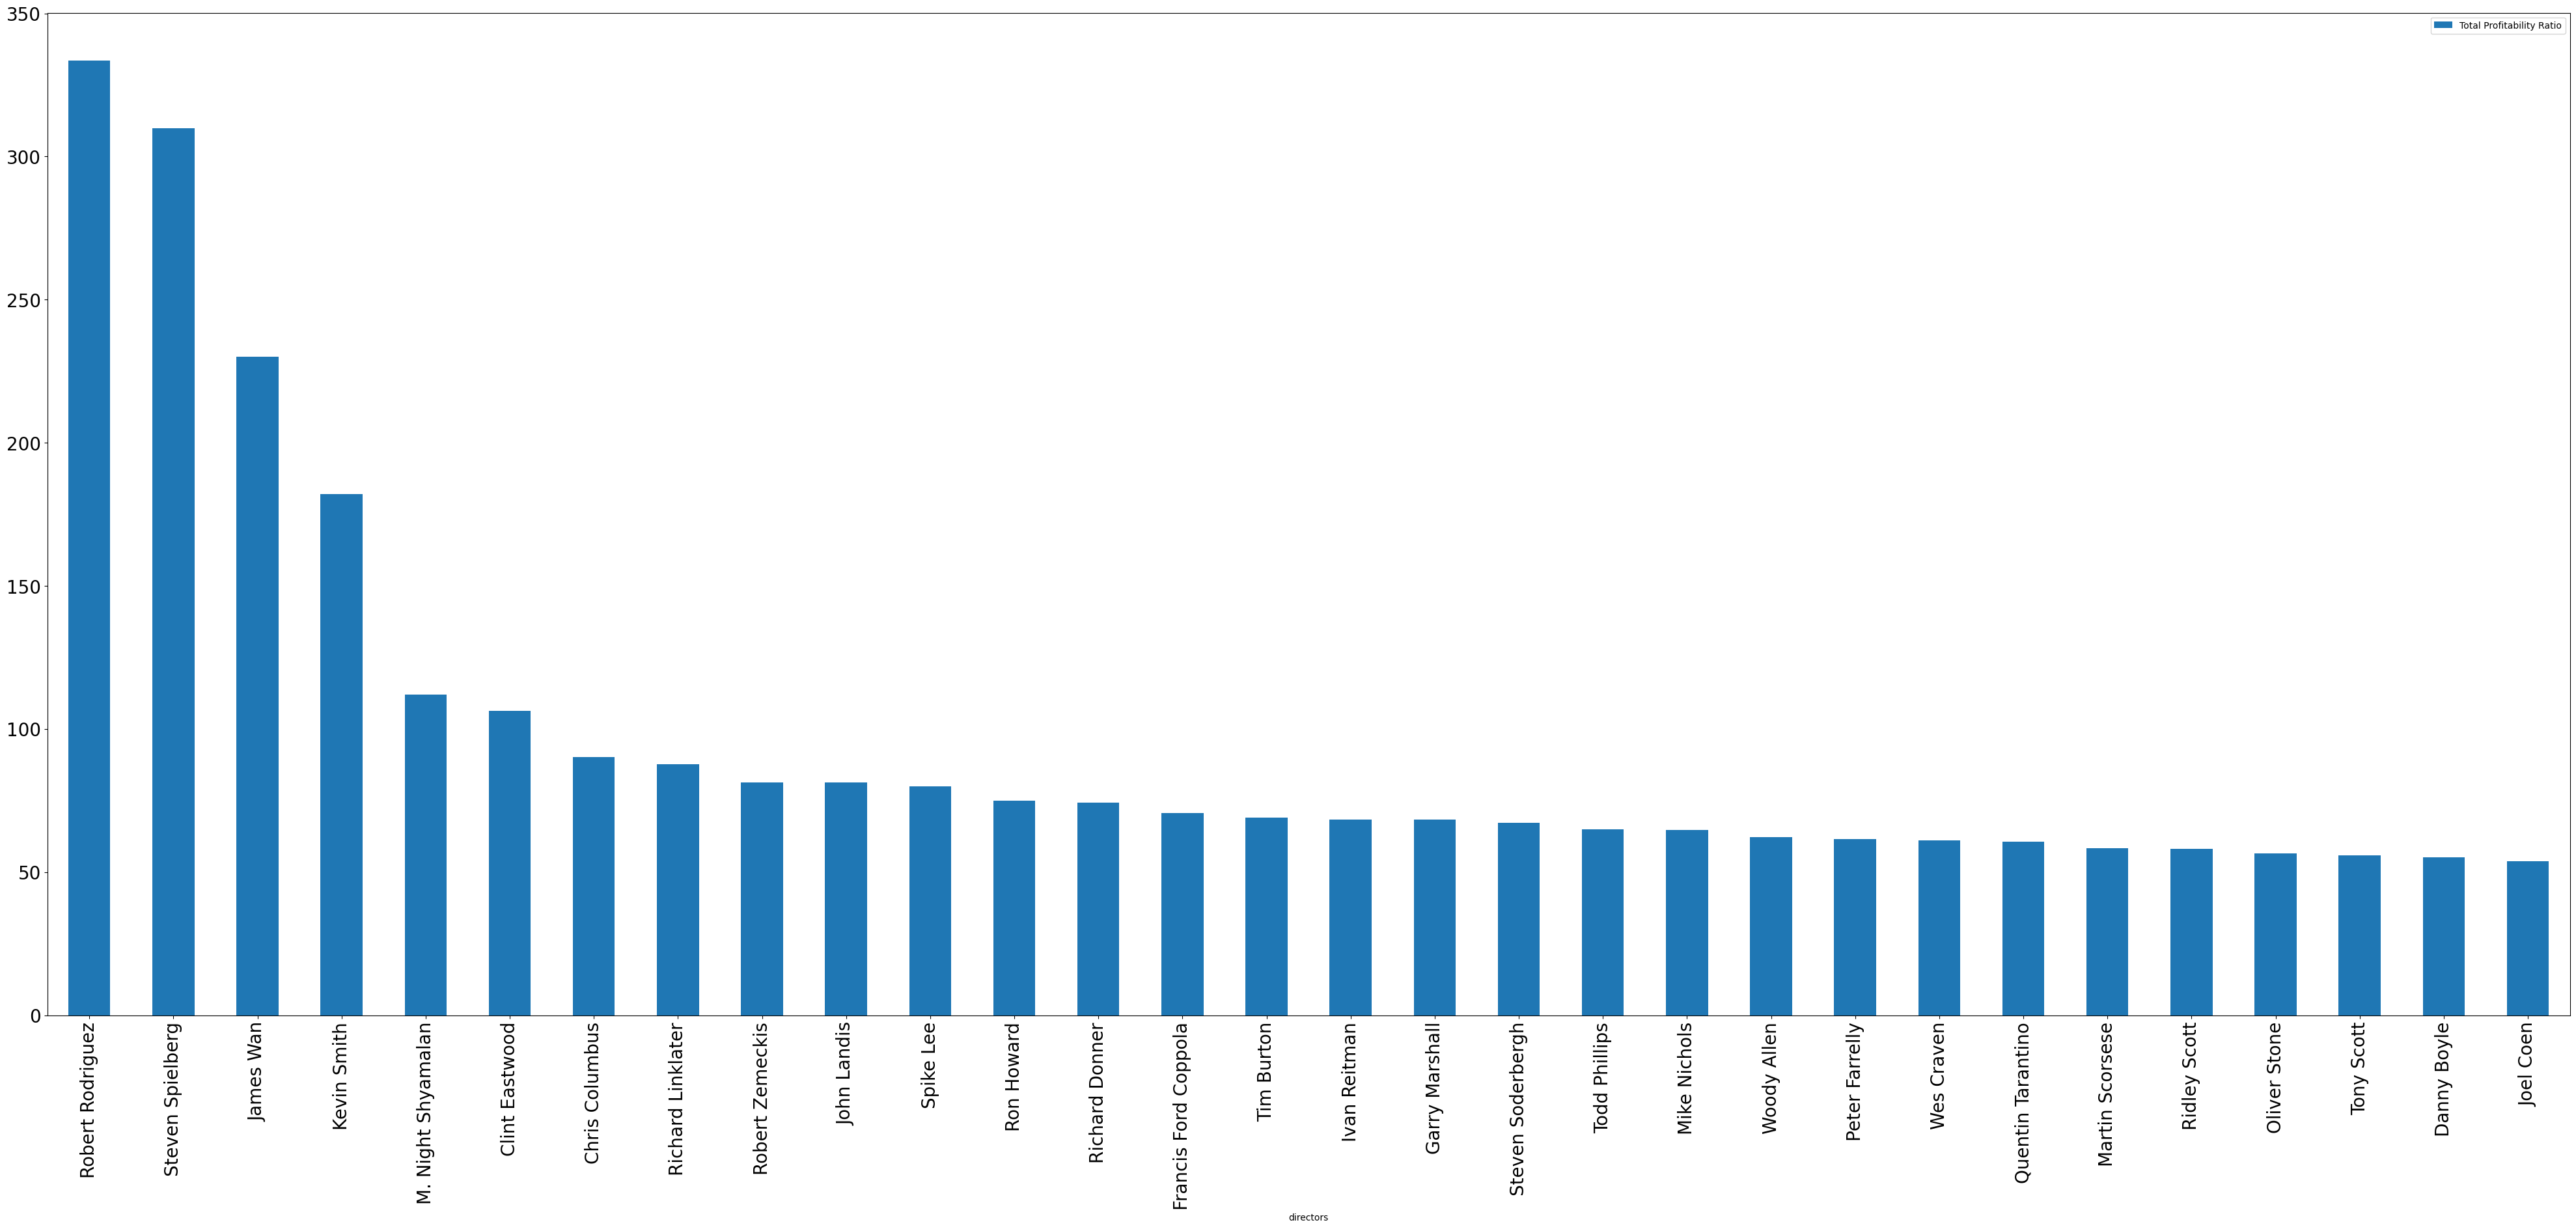

In [273]:
# Plot a bar chart of the total profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Total Profitability Ratio', kind='bar', figsize=(50, 20), fontsize=20)

In [274]:
by_directors_df['Profitability Ratio'] = by_directors_df['Total Profitability Ratio'] / by_directors_df['count']
by_directors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_directors_df.head()

,directors,count,Total Profitability Ratio,Profitability Ratio
61,James Wan,11,230.041839,20.912894
13,Robert Rodriguez,18,333.503921,18.527996
31,Kevin Smith,13,182.070137,14.005395
2,Steven Spielberg,29,309.963957,10.688412
22,M. Night Shyamalan,15,112.054682,7.470312


<Axes: xlabel='directors'>

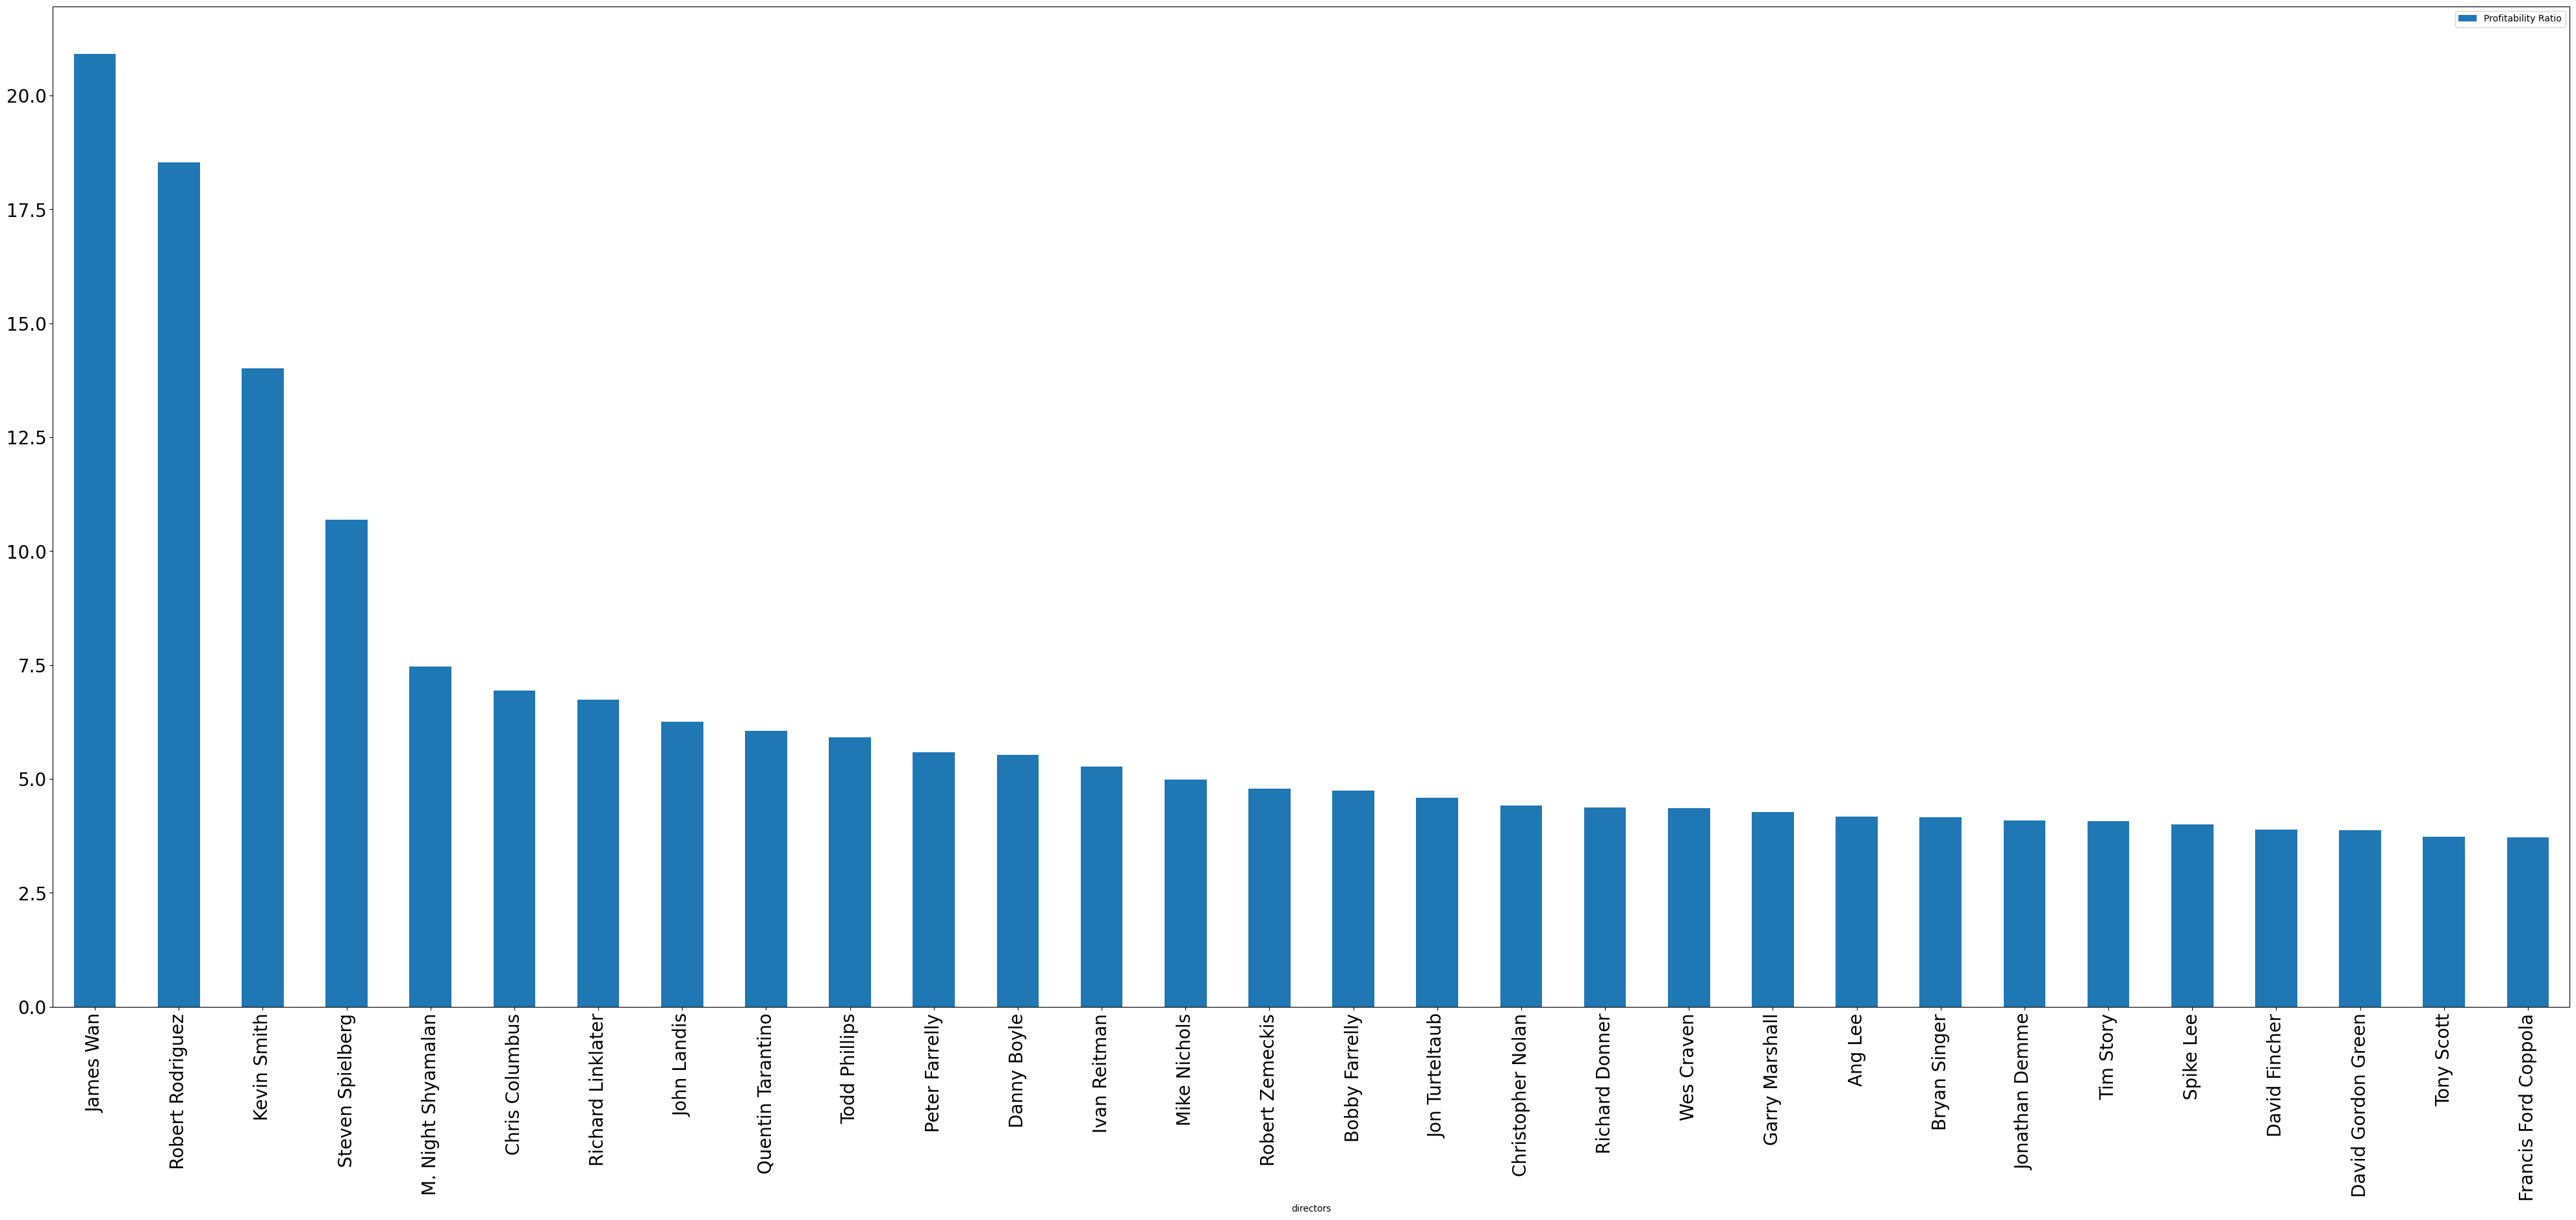

In [275]:
# Plot a bar chart of the profitability ratio for each director
by_directors_df.iloc[:30].plot(x='directors', y='Profitability Ratio', kind='bar', figsize=(50, 20), fontsize=20)

In [276]:
# Plot a bar chart of the profitability ratio for each movie of the top 10 directors
top_directors = by_directors_df.iloc[:10]

directors_expanded_df.loc[directors_expanded_df['directors'] == top_directors.iloc[0]['directors']]

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
3297,Saw,2004,R,7.6,483K,1200000.0,1.040042e+08,56000369.0,18276468.0,James Wan,"['Cary Elwes', 'Leigh Whannell', 'Danny Glover']",0,10,0,86.670182,1.664549e+08
4056,Dead Silence,2007,R,6.1,104K,20000000.0,2.238205e+07,16809076.0,7842725.0,James Wan,"['Ryan Kwanten', 'Amber Valletta', 'Donnie Wah...",0,0,0,1.119102,3.263659e+07
4074,Death Sentence,2007,R,6.7,76K,20000000.0,1.697446e+07,9534258.0,4231321.0,James Wan,"['Kevin Bacon', 'John Goodman', 'Kelly Preston']",0,0,0,0.848723,2.475147e+07
4757,Insidious,2010,PG-13,6.8,349K,1500000.0,1.001065e+08,54009150.0,13271464.0,James Wan,"['Patrick Wilson', 'Rose Byrne', 'Ty Simpkins']",0,16,0,66.737636,1.387876e+08
5211,The Conjuring,2013,R,7.5,575K,20000000.0,3.204152e+08,137446368.0,41855326.0,James Wan,"['Patrick Wilson', 'Vera Farmiga', 'Ron Living...",0,22,0,16.020758,4.158569e+08
5234,Insidious: Chapter 2,2013,PG-13,6.6,194K,5000000.0,1.619193e+08,83586447.0,40272103.0,James Wan,"['Patrick Wilson', 'Rose Byrne', 'Barbara Hers...",0,0,0,32.383864,2.101500e+08
5575,Furious 7,2015,PG-13,7.1,423K,190000000.0,1.515342e+09,353007020.0,147187040.0,James Wan,"['Vin Diesel', 'Paul Walker', 'Dwayne Johnson']",0,36,0,7.975487,1.933108e+09
5792,The Conjuring 2,2016,R,7.3,313K,40000000.0,3.228117e+08,102516140.0,40406314.0,James Wan,"['Vera Farmiga', 'Patrick Wilson', 'Madison Wo...",0,13,0,8.070293,4.066540e+08
6142,Aquaman,2018,PG-13,6.8,533K,160000000.0,1.152028e+09,335104314.0,67873522.0,James Wan,"['Jason Momoa', 'Amber Heard', 'Willem Dafoe']",0,36,0,7.200177,1.387120e+09
6560,Malignant,2021,R,6.2,115K,40000000.0,3.489179e+07,13391791.0,5434620.0,James Wan,"['Annabelle Wallis', 'Maddie Hasson', 'George ...",0,19,0,0.872295,3.893109e+07


In [277]:
by_directors_df['directors'].to_list()

summed_column = {}

for director in top_directors['directors']:
    summed_column[director] = directors_expanded_df.loc[directors_expanded_df['directors'] == director]['Profitability Ratio'].sum()
tested_df = pd.DataFrame(summed_column.items(), columns=['directors', 'Total Profitability Ratio'])
tested_df.head(10)

,directors,Total Profitability Ratio
0,James Wan,230.041839
1,Robert Rodriguez,333.503921
2,Kevin Smith,182.070137
3,Steven Spielberg,309.963957
4,M. Night Shyamalan,112.054682
5,Chris Columbus,90.233541
6,Richard Linklater,87.621748
7,John Landis,81.279731
8,Quentin Tarantino,60.619980
9,Todd Phillips,65.033553


In [278]:
# Get the total gross for each director
directors_gross_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'grossWorldWideAdjusted')
by_directors_df = by_directors_df.merge(directors_gross_df, on='directors')
by_directors_df['Average grossWorldWideAdjusted'] = by_directors_df['Total grossWorldWideAdjusted'] / by_directors_df['count']
by_directors_df.head()

,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
0,James Wan,11,230.041839,20.912894,5.193832e+09,4.721665e+08
1,Robert Rodriguez,18,333.503921,18.527996,2.286594e+09,1.270330e+08
2,Kevin Smith,13,182.070137,14.005395,3.978534e+08,3.060411e+07
3,Steven Spielberg,29,309.963957,10.688412,2.257930e+10,7.785966e+08
4,M. Night Shyamalan,15,112.054682,7.470312,4.858973e+09,3.239315e+08


In [279]:
# Now look at the number of awards won by each director

# Sum wins (not the number that the director has won, but the number of wins that the movies they directed have had)
directors_wins_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'wins')
by_directors_df = by_directors_df.merge(directors_wins_df, on='directors')
by_directors_df['Average Wins'] = by_directors_df['Total wins'] / by_directors_df['count']

# Sum nominations (not the number that the director has been nominated for, but the number of nominations that the movies they directed have had)
directors_nominations_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'nominations')
by_directors_df = by_directors_df.merge(directors_nominations_df, on='directors')
by_directors_df['Average Nominations'] = by_directors_df['Total nominations'] / by_directors_df['count']

# Sum oscars (not the number that the director has won, but the number of oscars that the movies they directed have won)
directors_oscars_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'oscars')
by_directors_df = by_directors_df.merge(directors_oscars_df, on='directors')
by_directors_df['Average Oscars'] = by_directors_df['Total oscars'] / by_directors_df['count']

# Average ratings
directors_ratings_df = sum_columns_per_unique(directors_expanded_df, by_directors_df, 'directors', 'Rating')
by_directors_df = by_directors_df.merge(directors_ratings_df, on='directors')
by_directors_df['Total Rating'] = by_directors_df['Total Rating'] / by_directors_df['count']
by_directors_df.rename(columns = {'Total Rating' : 'Average Rating'}, inplace=True)

by_directors_df.head()


,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
0,James Wan,11,230.041839,20.912894,5.193832e+09,4.721665e+08,0,0.0,158,14.363636,0,0.000000,6.754545
1,Robert Rodriguez,18,333.503921,18.527996,2.286594e+09,1.270330e+08,0,0.0,171,9.500000,0,0.000000,6.083333
2,Kevin Smith,13,182.070137,14.005395,3.978534e+08,3.060411e+07,0,0.0,59,4.538462,0,0.000000,6.523077
3,Steven Spielberg,29,309.963957,10.688412,2.257930e+10,7.785966e+08,0,0.0,1740,60.000000,55,1.896552,7.427586
4,M. Night Shyamalan,15,112.054682,7.470312,4.858973e+09,3.239315e+08,0,0.0,236,15.733333,7,0.466667,6.133333


In [280]:
by_directors_df.sort_values('Average grossWorldWideAdjusted', ascending=False, inplace=True)
by_directors_df.head(10)

,directors,count,Total Profitability Ratio,Profitability Ratio,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
3,Steven Spielberg,29,309.963957,10.688412,2.257930e+10,7.785966e+08,0,0.0,1740,60.000000,55,1.896552,7.427586
30,Michael Bay,14,51.252467,3.660890,9.559108e+09,6.827934e+08,0,0.0,289,20.642857,13,0.928571,6.457143
17,Christopher Nolan,10,44.197545,4.419754,6.590538e+09,6.590538e+08,0,0.0,1466,146.600000,5,0.500000,8.220000
53,Gore Verbinski,10,28.194286,2.819429,5.710376e+09,5.710376e+08,0,0.0,278,27.800000,9,0.900000,6.900000
5,Chris Columbus,13,90.233541,6.941042,7.294913e+09,5.611471e+08,0,0.0,194,14.923077,6,0.461538,6.669231
22,Bryan Singer,10,41.632197,4.163220,5.114061e+09,5.114061e+08,0,0.0,304,30.400000,2,0.200000,7.200000
49,Roland Emmerich,13,37.345381,2.872722,6.492016e+09,4.993858e+08,0,0.0,136,10.461538,3,0.230769,6.069231
14,Robert Zemeckis,17,81.351237,4.785367,8.360206e+09,4.917768e+08,0,0.0,326,19.176471,9,0.529412,7.188235
0,James Wan,11,230.041839,20.912894,5.193832e+09,4.721665e+08,0,0.0,158,14.363636,0,0.000000,6.754545
63,Sam Raimi,14,33.293062,2.378076,6.082617e+09,4.344727e+08,0,0.0,297,21.214286,5,0.357143,6.807143


In [281]:
by_directors_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 3 to 90
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   directors                       91 non-null     object 
 1   count                           91 non-null     int64  
 2   Total Profitability Ratio       91 non-null     float64
 3   Profitability Ratio             91 non-null     float64
 4   Total grossWorldWideAdjusted    91 non-null     float64
 5   Average grossWorldWideAdjusted  91 non-null     float64
 6   Total wins                      91 non-null     int64  
 7   Average Wins                    91 non-null     float64
 8   Total nominations               91 non-null     int64  
 9   Average Nominations             91 non-null     float64
 10  Total oscars                    91 non-null     int64  
 11  Average Oscars                  91 non-null     float64
 12  Average Rating                  91 non-null

<Axes: xlabel='directors'>

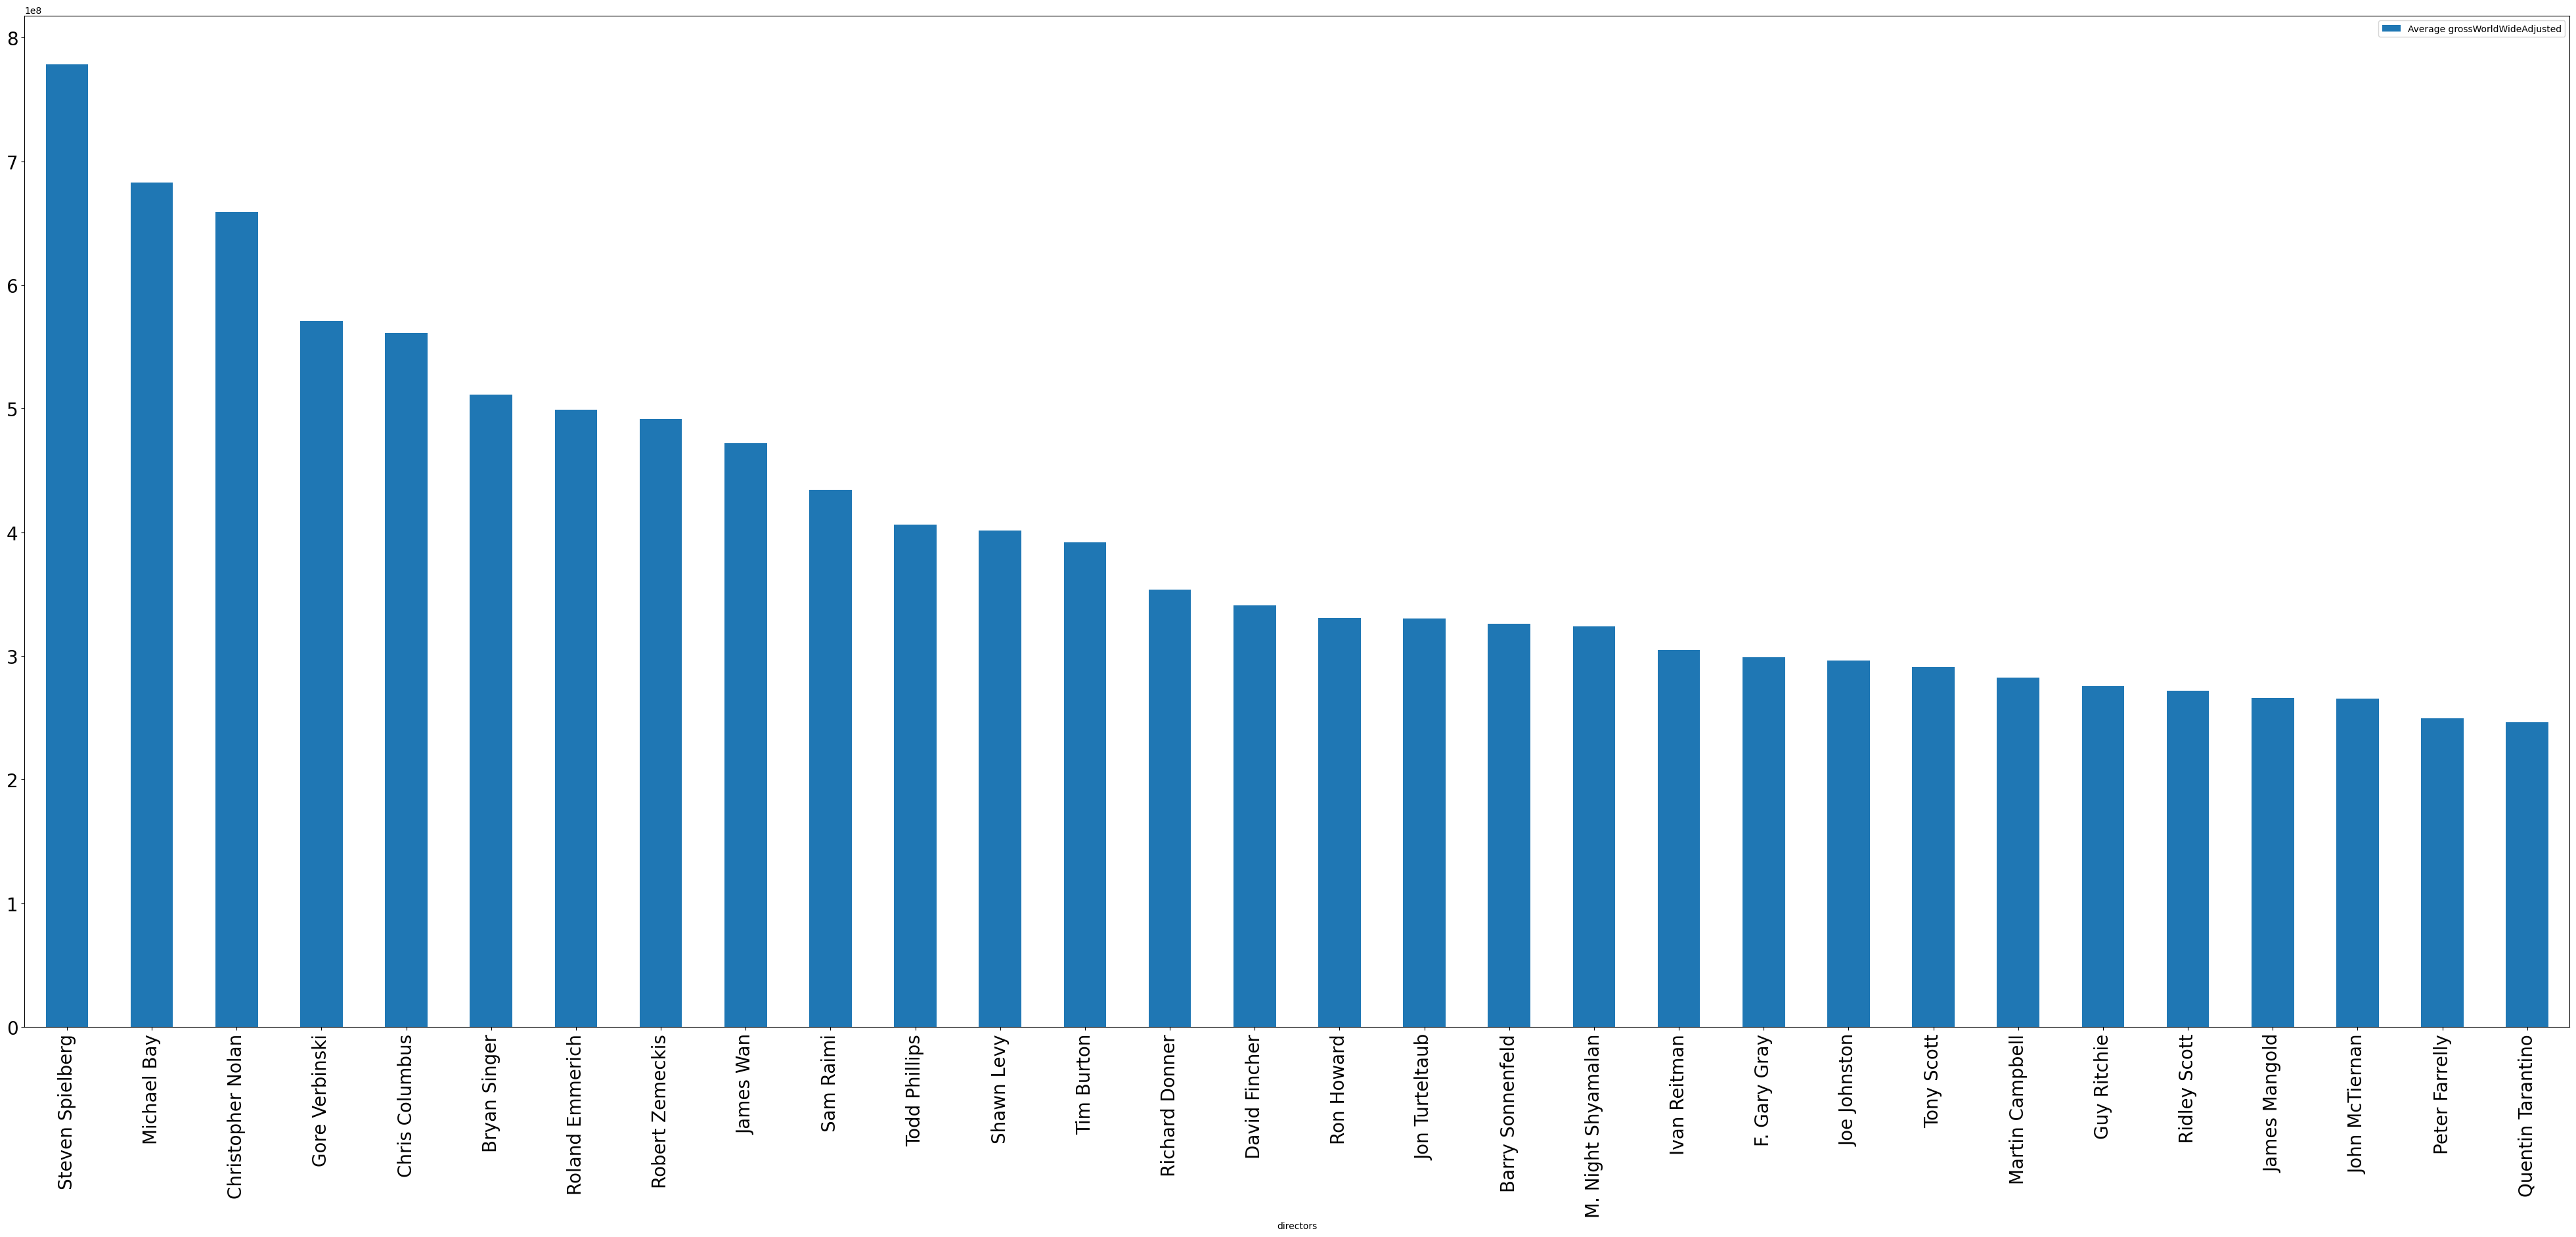

In [282]:
by_directors_df.iloc[:30].plot(x='directors', y='Average grossWorldWideAdjusted', kind='bar', figsize=(50, 20), fontsize=20)

array([[<Axes: title={'center': 'Average grossWorldWideAdjusted'}>]],
      dtype=object)

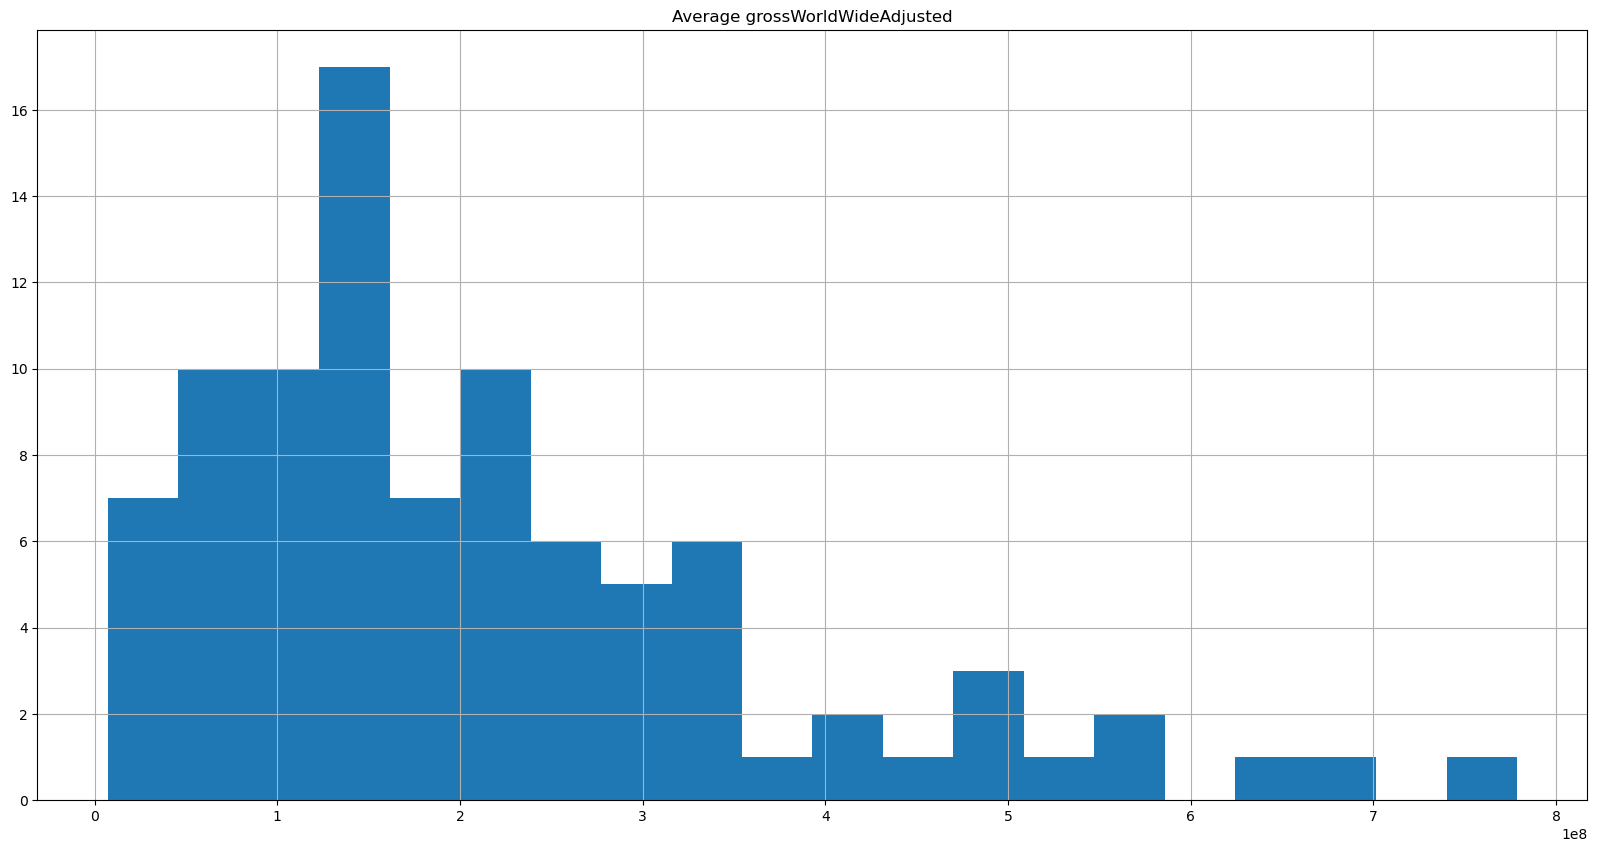

In [283]:
by_directors_df.hist(column='Average grossWorldWideAdjusted', bins=20, figsize=(20, 10))

In [315]:
# Look up all the movies of a given director
highest_grossing_director_movies_df = directors_expanded_df.loc[directors_expanded_df['directors'] == 'Steven Spielberg']
highest_grossing_director_movies_df.sort_values('Year', ascending=False, inplace=True)
highest_grossing_director_movies_df.reset_index(drop=True, inplace=True)
highest_grossing_director_movies_df

C:\Users\hunte\AppData\Local\Temp\ipykernel_35024\627334357.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_grossing_director_movies_df.sort_values('Year', ascending=False, inplace=True)


,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,The Fabelmans,2022,PG-13,7.5,124K,40000000.0,4.562070e+07,17348945.0,161579.0,Steven Spielberg,"['Michelle Williams', 'Gabriel LaBelle', 'Paul...",0,297,7,1.140518,4.713743e+07
1,West Side Story,2021,PG-13,7.1,99K,100000000.0,7.601617e+07,38530322.0,10574618.0,Steven Spielberg,"['Ansel Elgort', 'Rachel Zegler', 'Ariana DeBo...",0,301,0,0.760162,8.481630e+07
2,Ready Player One,2018,PG-13,7.4,506K,175000000.0,6.078744e+08,137715350.0,41764050.0,Steven Spielberg,"['Tye Sheridan', 'Olivia Cooke', 'Ben Mendelso...",0,57,1,3.473568,7.319220e+08
3,The Post,2017,PG-13,7.2,166K,50000000.0,1.937647e+08,81903458.0,526011.0,Steven Spielberg,"['Meryl Streep', 'Tom Hanks', 'Sarah Paulson']",0,116,2,3.875293,2.389961e+08
4,The BFG,2016,PG,6.3,96K,140000000.0,1.952434e+08,55483770.0,18775350.0,Steven Spielberg,"['Mark Rylance', 'Ruby Barnhill', 'Penelope Wi...",0,26,1,1.394596,2.459530e+08
5,Bridge of Spies,2015,PG-13,7.6,333K,40000000.0,1.654783e+08,72313754.0,15371203.0,Steven Spielberg,"['Tom Hanks', 'Mark Rylance', 'Alan Alda']",0,104,0,4.136959,2.110991e+08
6,Indiana Jones and the Kingdom of the Crystal ...,2008,PG-13,6.2,499K,185000000.0,7.866360e+08,317101119.0,100137835.0,Steven Spielberg,"['Harrison Ford', 'Cate Blanchett', 'Shia LaBe...",0,42,1,4.252087,1.104890e+09
7,Munich,2005,R,7.5,245K,70000000.0,1.309824e+08,47403685.0,4152260.0,Steven Spielberg,"['Eric Bana', 'Daniel Craig', 'Marie-Josée Cro...",0,75,5,1.871177,2.028064e+08
8,War of the Worlds,2005,PG-13,6.5,485K,132000000.0,6.038735e+08,234280354.0,64878725.0,Steven Spielberg,"['Tom Cruise', 'Dakota Fanning', 'Tim Robbins']",0,49,3,4.574799,9.350066e+08
9,The Terminal,2004,PG-13,7.4,508K,60000000.0,2.191001e+08,77872883.0,19053199.0,Steven Spielberg,"['Tom Hanks', 'Catherine Zeta-Jones', 'Chi McB...",0,8,0,3.651668,3.506616e+08


<Axes: xlabel='Year'>

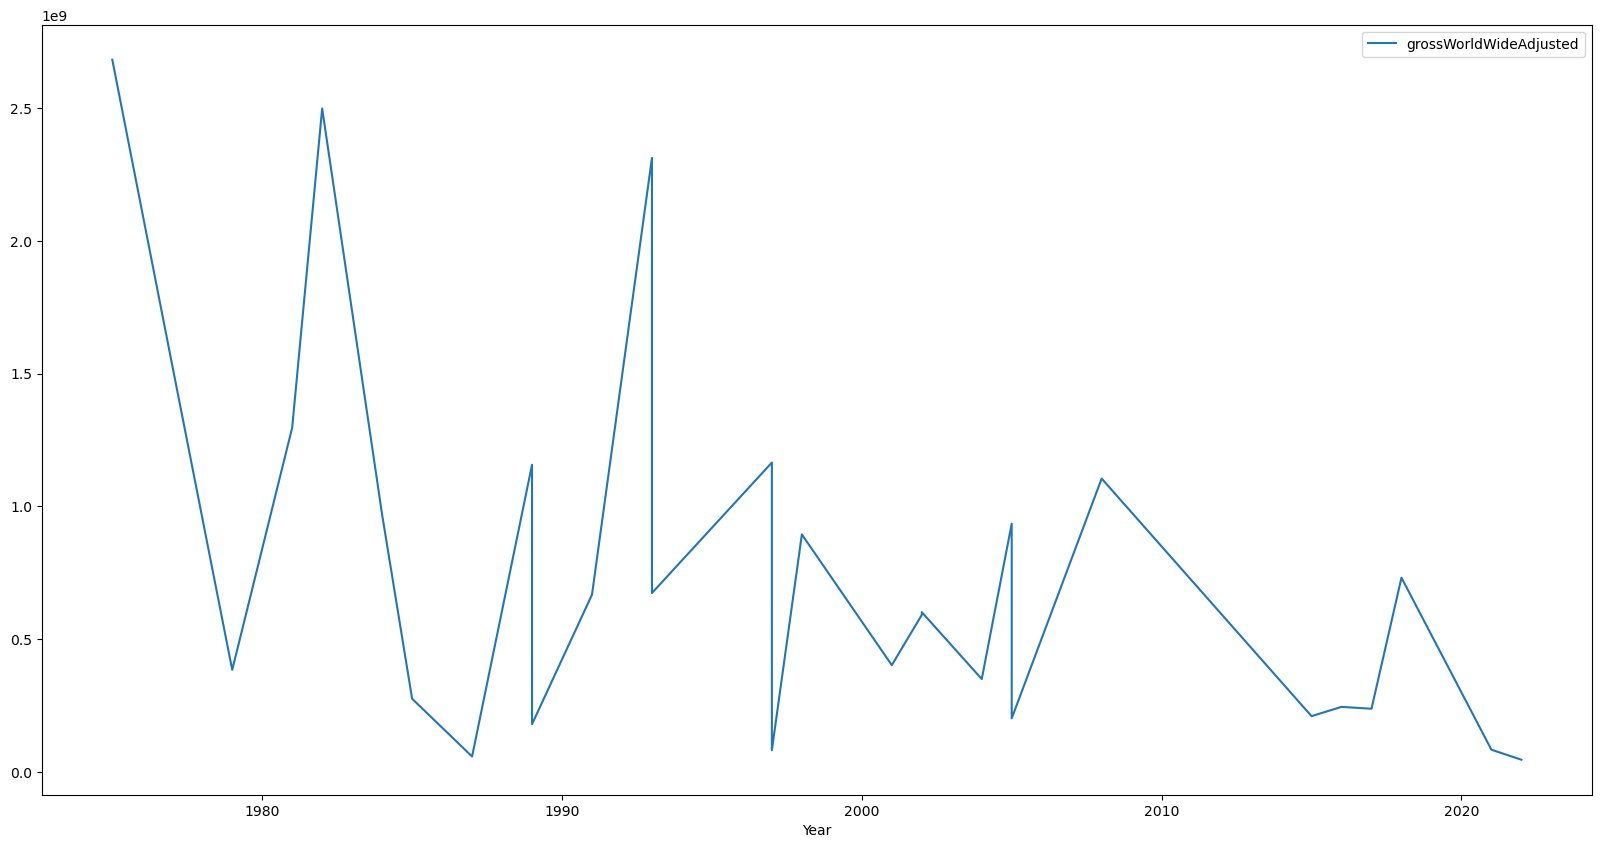

In [316]:
highest_grossing_director_movies_df.plot(x = 'Year', y = 'grossWorldWideAdjusted', kind = 'line', figsize=(20, 10))

# Actors

In [285]:
# Expand the columns with lists: 'stars' into separate rows
actors_expanded_df = expand_lists(df, ['stars'])

In [286]:
by_actors_df = pd.DataFrame(actors_expanded_df.value_counts('stars'))
by_actors_df.reset_index(inplace=True)
by_actors_df

,stars,count
0,Robert De Niro,64
1,Nicolas Cage,57
2,Samuel L. Jackson,53
3,Tom Hanks,51
4,Bruce Willis,47
...,...,...
7006,Julius Harris,1
7007,Julius Erving,1
7008,Juliette Paskowitz,1
7009,Carlene Watkins,1


In [287]:
# Drop the actors with fewer than 10 movies
by_actors_df = by_actors_df[by_actors_df['count'] >= 10]
by_actors_df

,stars,count
0,Robert De Niro,64
1,Nicolas Cage,57
2,Samuel L. Jackson,53
3,Tom Hanks,51
4,Bruce Willis,47
...,...,...
444,Rip Torn,10
445,Rutger Hauer,10
446,Gary Busey,10
447,Jet Li,10


In [288]:
actors_profitability_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'Profitability Ratio')
directors_profitability_df.head()
actors_profitability_df.head()

,stars,Total Profitability Ratio
0,Robert De Niro,156.035469
1,Nicolas Cage,150.731289
2,Samuel L. Jackson,156.595896
3,Tom Hanks,203.872033
4,Bruce Willis,118.946277


In [289]:
# Add the profitability ratio for each director to the dataframe
by_actors_df = by_actors_df.merge(actors_profitability_df, on='stars')
by_actors_df.head()

,stars,count,Total Profitability Ratio
0,Robert De Niro,64,156.035469
1,Nicolas Cage,57,150.731289
2,Samuel L. Jackson,53,156.595896
3,Tom Hanks,51,203.872033
4,Bruce Willis,47,118.946277


In [290]:
by_actors_df.sort_values('Total Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio
53,Drew Barrymore,28,367.409965
31,John Travolta,33,252.481238
17,Harrison Ford,38,239.712601
3,Tom Hanks,51,203.872033
290,Emile Hirsch,13,201.512147


<Axes: xlabel='stars'>

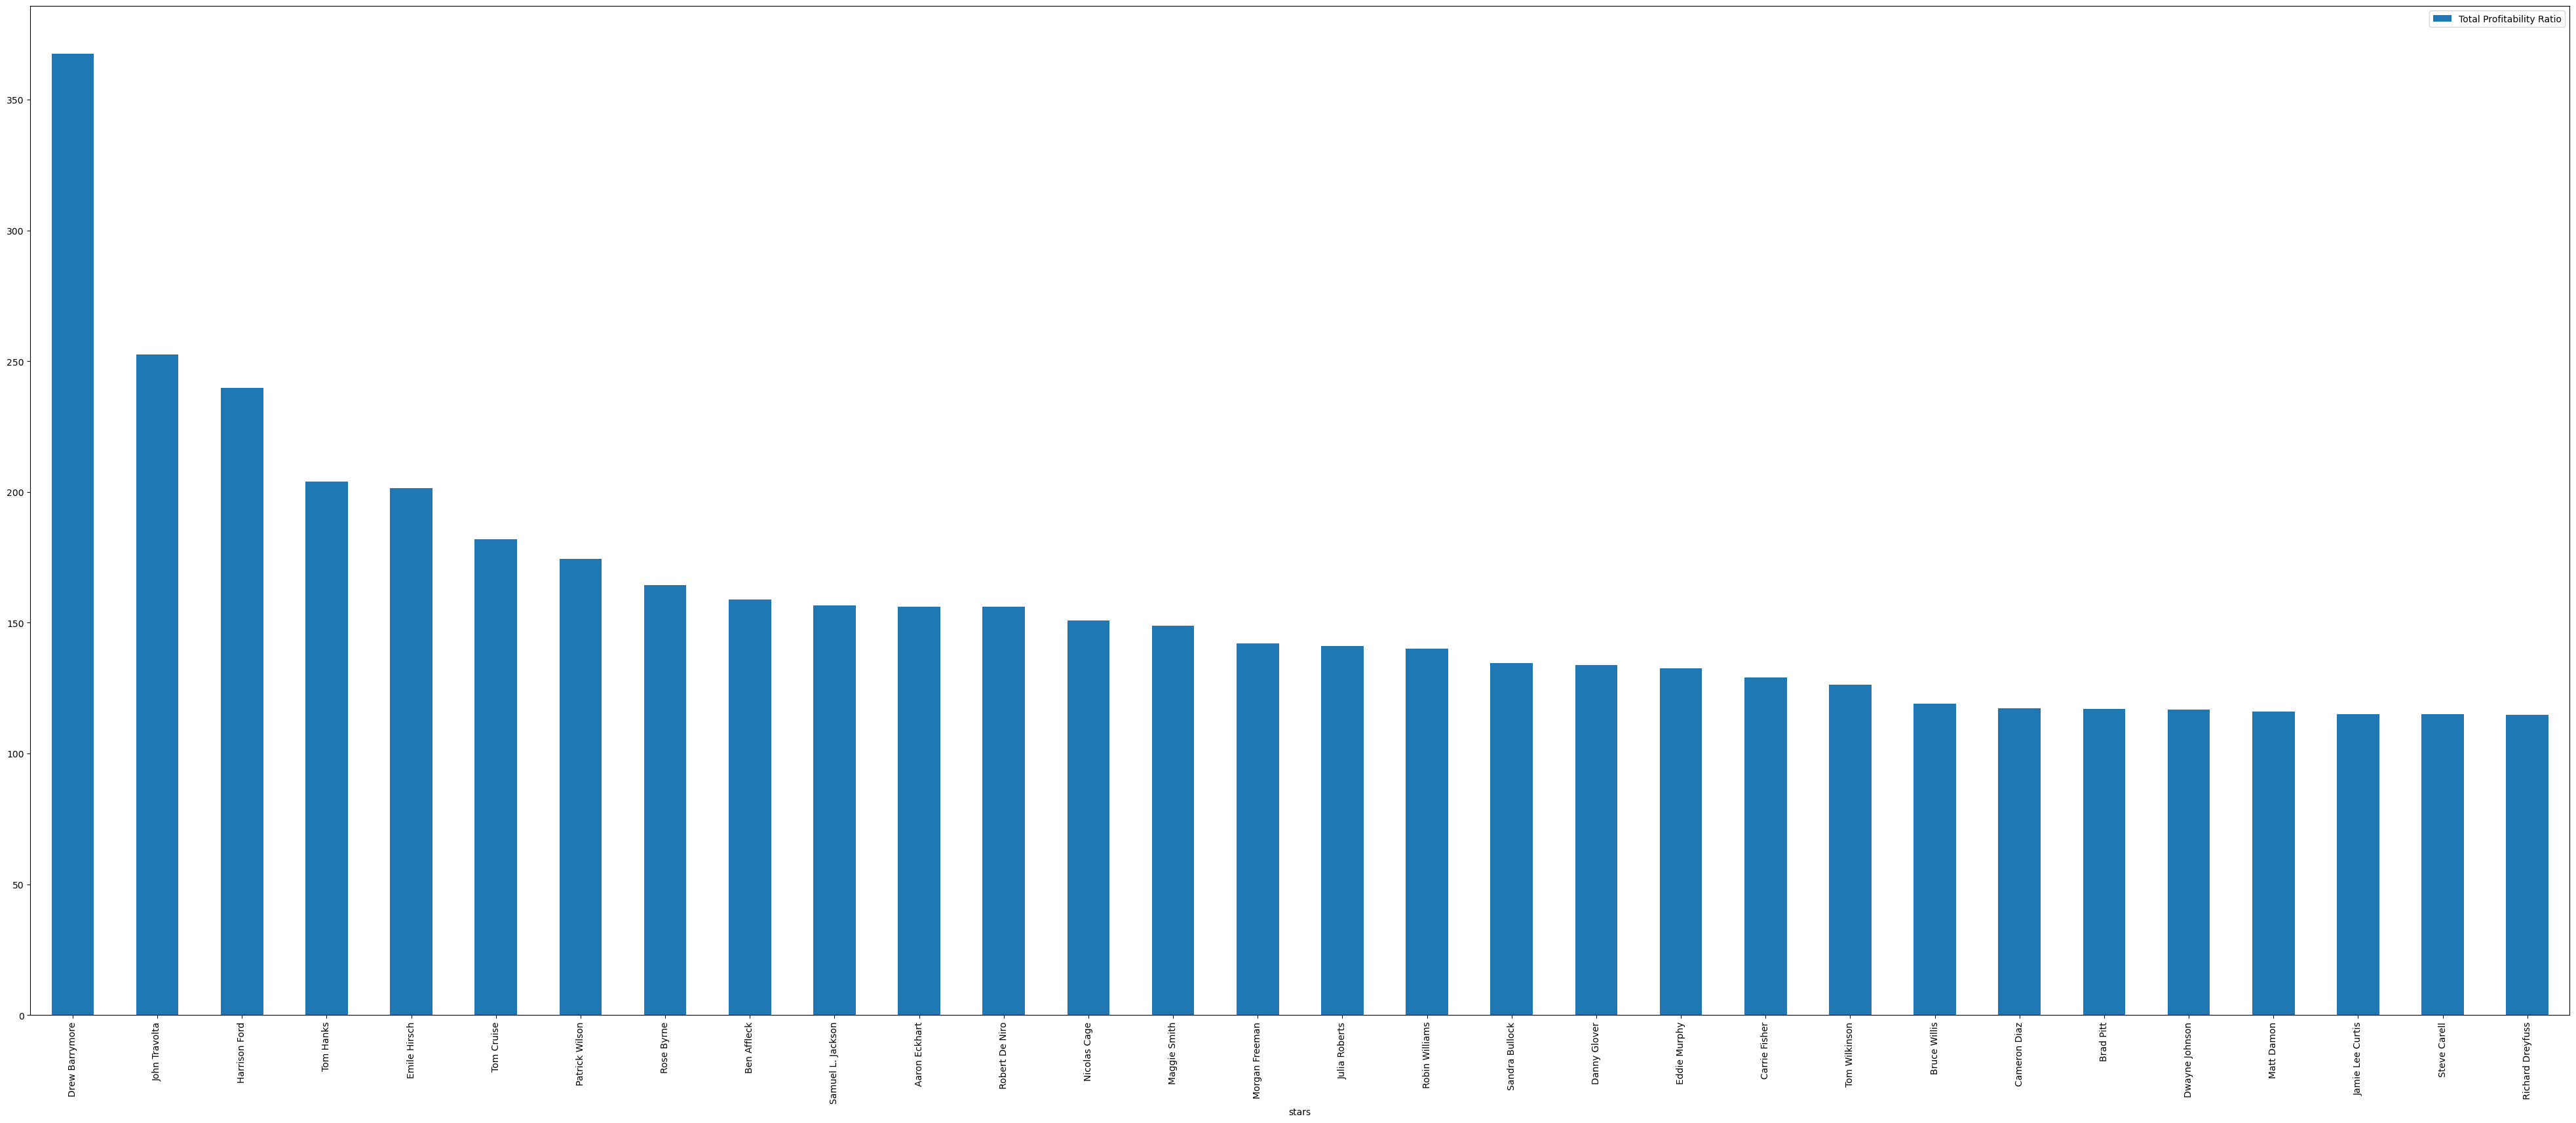

In [291]:
# Plot a bar chart of the total profitability ratio for each director, excluding jet li since he is bt far the highest
by_actors_df.iloc[:30].plot(x='stars', y='Total Profitability Ratio', kind='bar', figsize=(50, 20))

In [292]:
by_actors_df['Profitability Ratio'] = by_actors_df['Total Profitability Ratio'] / by_actors_df['count']
by_actors_df.sort_values('Profitability Ratio', ascending=False, inplace=True)
by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio
290,Emile Hirsch,13,201.512147,15.500934
416,Maggie Smith,10,148.864126,14.886413
53,Drew Barrymore,28,367.409965,13.121784
398,Carrie Fisher,10,128.963986,12.896399
206,Rose Byrne,16,164.354465,10.272154


<Axes: xlabel='stars'>

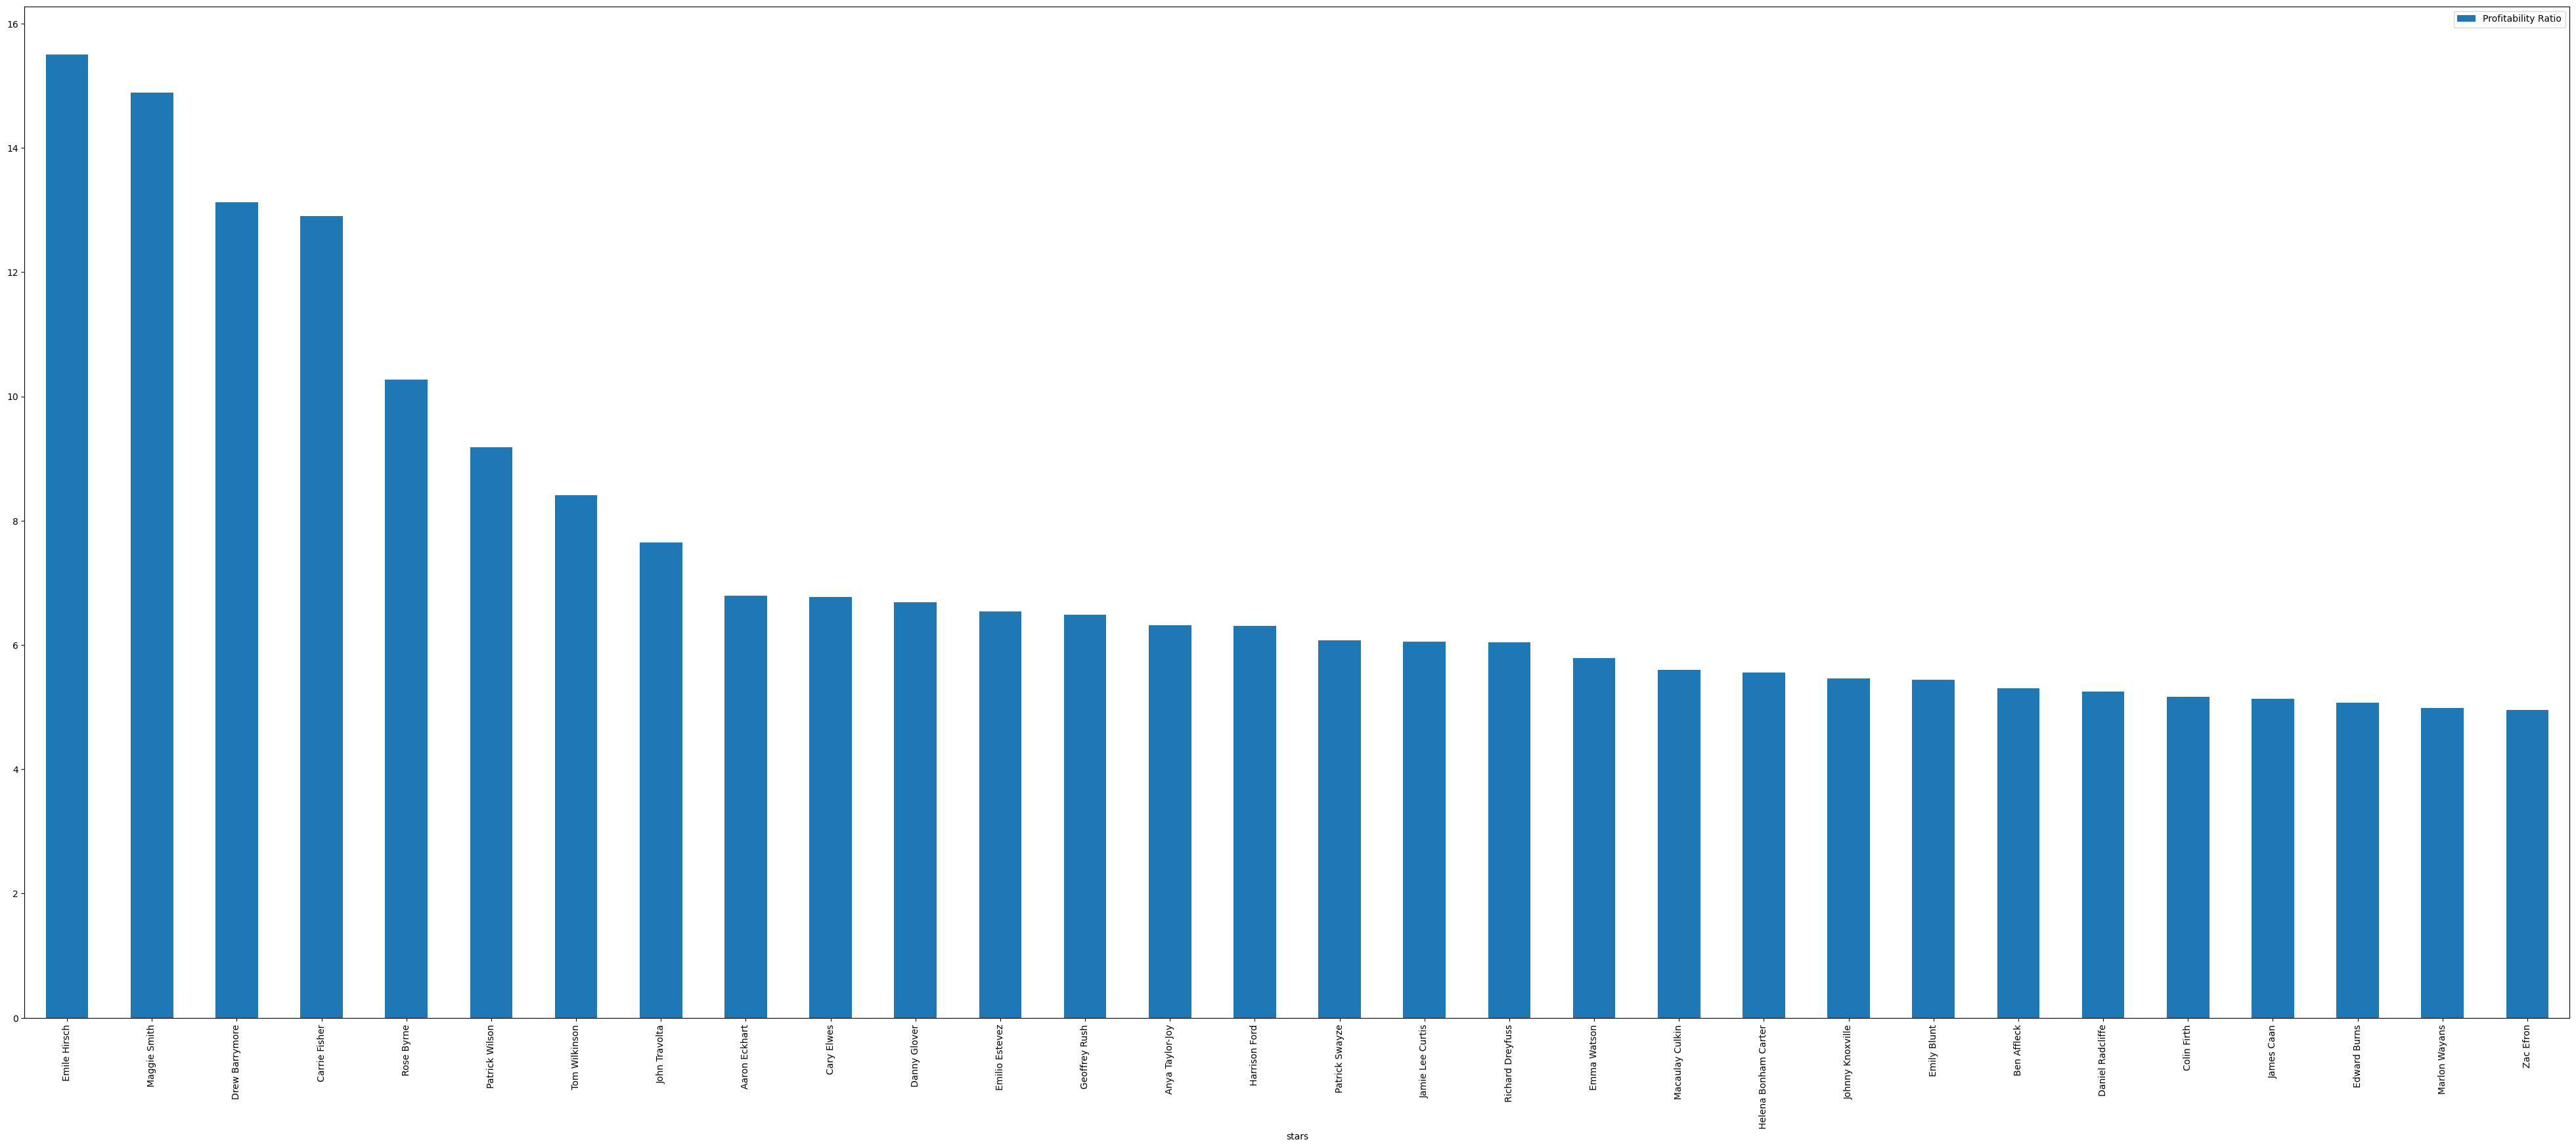

In [293]:
# Plot a bar chart of the profitability ratio for each director, excluding jet li since he is by far the highest
by_actors_df.iloc[:30].plot(x='stars', y='Profitability Ratio', kind='bar', figsize=(50, 20))

In [294]:
# Now look at the number of awards won by each actor

# Sum wins (not the number that the actor has won, but the number of wins that the movies they acted in have had)
actors_wins_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'wins')
by_actors_df = by_actors_df.merge(actors_wins_df, on='stars')
by_actors_df['Average Wins'] = by_actors_df['Total wins'] / by_actors_df['count']

# Sum nominations (not the number that the actor has been nominated for, but the number of nominations that the movies they acted in have had)
actors_nominations_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'nominations')
by_actors_df = by_actors_df.merge(actors_nominations_df, on='stars')
by_actors_df['Average Nominations'] = by_actors_df['Total nominations'] / by_actors_df['count']

# Sum oscars (not the number that the actor has won, but the number of oscars that the movies they acted in have won)
actors_oscars_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'oscars')
by_actors_df = by_actors_df.merge(actors_oscars_df, on='stars')
by_actors_df['Average Oscars'] = by_actors_df['Total oscars'] / by_actors_df['count']

# Average ratings
actors_ratings_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'Rating')
by_actors_df = by_actors_df.merge(actors_ratings_df, on='stars')
by_actors_df['Total Rating'] = by_actors_df['Total Rating'] / by_actors_df['count']
by_actors_df.rename(columns = {'Total Rating' : 'Average Rating'}, inplace=True)

by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating
0,Emile Hirsch,13,201.512147,15.500934,0,0.0,315,24.230769,4,0.307692,6.830769
1,Maggie Smith,10,148.864126,14.886413,0,0.0,132,13.200000,1,0.100000,6.650000
2,Drew Barrymore,28,367.409965,13.121784,0,0.0,172,6.142857,0,0.000000,6.200000
3,Carrie Fisher,10,128.963986,12.896399,0,0.0,96,9.600000,5,0.500000,6.630000
4,Rose Byrne,16,164.354465,10.272154,0,0.0,195,12.187500,2,0.125000,6.368750


In [295]:
# Get the total gross for each director
actors_gross_df = sum_columns_per_unique(actors_expanded_df, by_actors_df, 'stars', 'grossWorldWideAdjusted')
by_actors_df = by_actors_df.merge(actors_gross_df, on='stars')
by_actors_df['Average grossWorldWideAdjusted'] = by_actors_df['Total grossWorldWideAdjusted'] / by_actors_df['count']
by_actors_df.head()

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
0,Emile Hirsch,13,201.512147,15.500934,0,0.0,315,24.230769,4,0.307692,6.830769,6.809922e+08,5.238402e+07
1,Maggie Smith,10,148.864126,14.886413,0,0.0,132,13.200000,1,0.100000,6.650000,1.325195e+09,1.325195e+08
2,Drew Barrymore,28,367.409965,13.121784,0,0.0,172,6.142857,0,0.000000,6.200000,5.570236e+09,1.989370e+08
3,Carrie Fisher,10,128.963986,12.896399,0,0.0,96,9.600000,5,0.500000,6.630000,7.844499e+09,7.844499e+08
4,Rose Byrne,16,164.354465,10.272154,0,0.0,195,12.187500,2,0.125000,6.368750,2.659663e+09,1.662289e+08


In [296]:
by_actors_df.sort_values('Average grossWorldWideAdjusted', ascending=False, inplace=True)
by_actors_df.head(10)

,stars,count,Total Profitability Ratio,Profitability Ratio,Total wins,Average Wins,Total nominations,Average Nominations,Total oscars,Average Oscars,Average Rating,Total grossWorldWideAdjusted,Average grossWorldWideAdjusted
24,Daniel Radcliffe,12,63.020631,5.251719,0,0.0,508,42.333333,14,1.166667,7.258333,1.200877e+10,1.000731e+09
18,Emma Watson,14,81.093479,5.792391,0,0.0,848,60.571429,16,1.142857,7.250000,1.395107e+10,9.965052e+08
3,Carrie Fisher,10,128.963986,12.896399,0,0.0,96,9.600000,5,0.500000,6.630000,7.844499e+09,7.844499e+08
99,Zoe Saldana,12,42.025402,3.502117,0,0.0,466,38.833333,2,0.166667,6.450000,8.816804e+09,7.347337e+08
37,Chris Pratt,16,74.347440,4.646715,0,0.0,585,36.562500,8,0.500000,6.793750,1.099395e+10,6.871220e+08
155,Sam Worthington,13,39.198414,3.015263,0,0.0,442,34.000000,0,0.000000,6.500000,8.280314e+09,6.369472e+08
74,Ian McKellen,15,56.940507,3.796034,0,0.0,678,45.200000,8,0.533333,7.393333,9.303967e+09,6.202645e+08
116,Chris Evans,21,69.199749,3.295226,0,0.0,641,30.523810,4,0.190476,6.761905,1.230524e+10,5.859637e+08
40,Mike Myers,12,55.123580,4.593632,0,0.0,239,19.916667,4,0.333333,6.266667,6.541983e+09,5.451653e+08
251,Chris Hemsworth,13,30.634721,2.356517,0,0.0,314,24.153846,1,0.076923,6.753846,6.791063e+09,5.223894e+08


array([[<Axes: title={'center': 'Average grossWorldWideAdjusted'}>]],
      dtype=object)

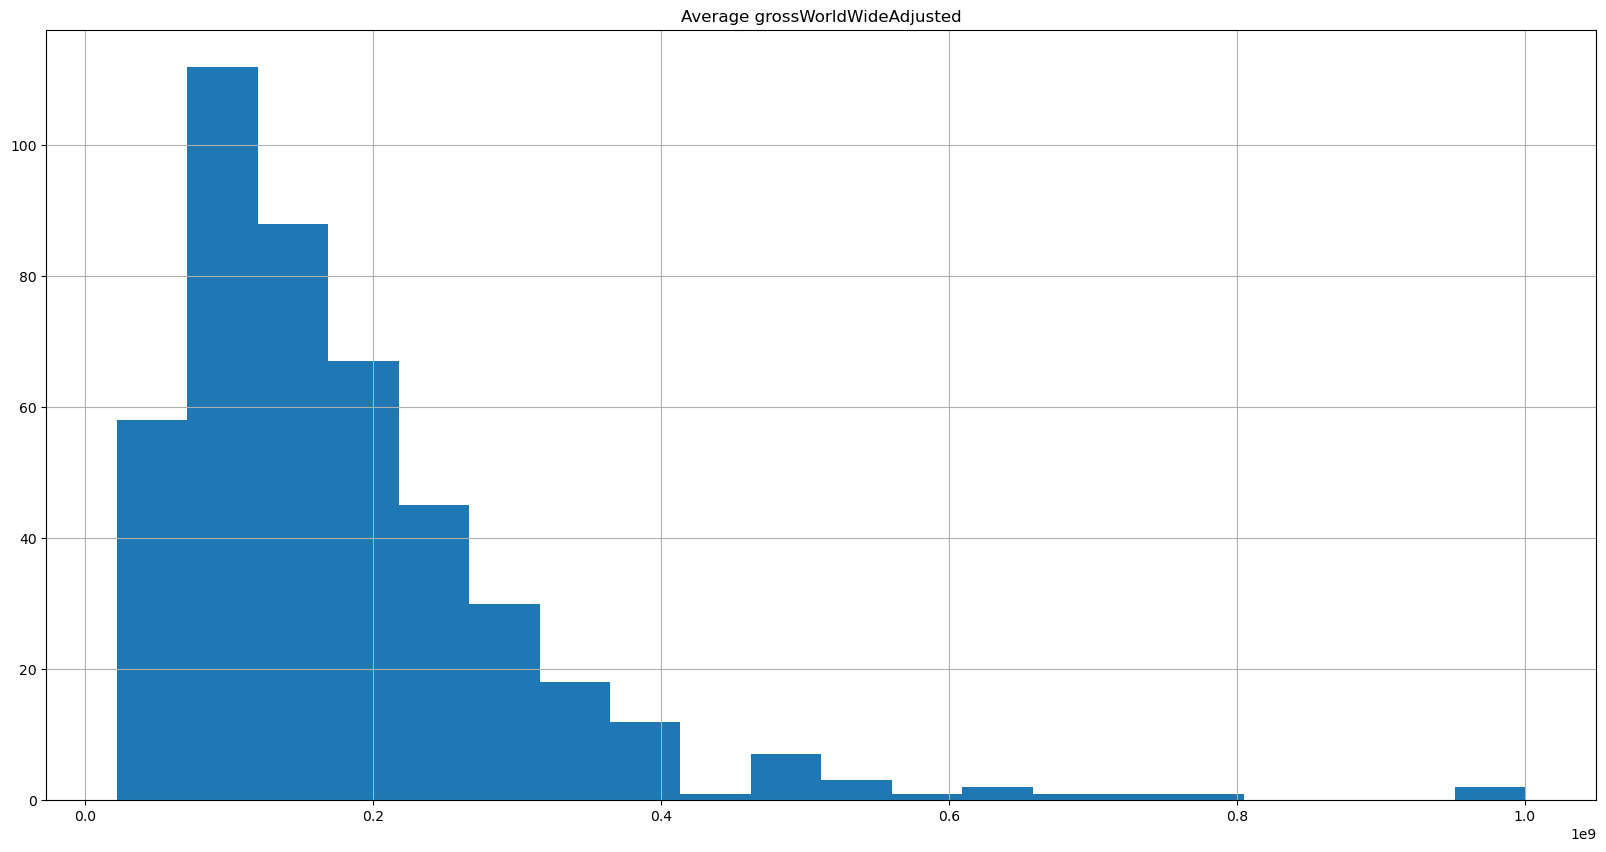

In [297]:
by_actors_df.hist(column='Average grossWorldWideAdjusted', bins=20, figsize=(20, 10))

In [ ]:
# Look up all the movies of an actor
highest_grossing_actor_movies_df = actors_expanded_df.loc[actors_expanded_df['stars'] == 'Daniel Radcliffe']
highest_grossing_actor_movies_df.sort_values('Year', ascending=False, inplace=True)
highest_grossing_actor_movies_df.reset_index(drop=True, inplace=True)
highest_grossing_actor_movies_df

C:\Users\hunte\AppData\Local\Temp\ipykernel_35024\3219044139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  highest_grossing_actor_movies_df.sort_values('Year', ascending=False, inplace=True)


,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
0,The Lost City,2022,PG-13,6.1,167K,68000000.0,1.929077e+08,105344029.0,30453269.0,"['Aaron Nee', 'Adam Nee']",Daniel Radcliffe,0,10,0,2.836878,1.993212e+08
1,Swiss Army Man,2016,R,6.9,136K,3000000.0,4.935501e+06,4210454.0,105453.0,"['Daniel Kwan', 'Daniel Scheinert']",Daniel Radcliffe,0,31,0,1.645167,6.217374e+06
2,Victor Frankenstein,2015,PG-13,6.0,62K,65000000.0,3.422730e+07,5775076.0,2469341.0,['Paul McGuigan'],Daniel Radcliffe,0,0,0,0.526574,4.366343e+07
3,Harry Potter and the Deathly Hallows: Part 2,2011,PG-13,8.1,980K,125000000.0,1.342500e+09,381447587.0,169189427.0,['David Yates'],Daniel Radcliffe,0,95,3,10.739998,1.804584e+09
4,Harry Potter and the Deathly Hallows: Part 1,2010,PG-13,7.7,620K,125000000.0,9.608977e+08,296374621.0,125017372.0,['David Yates'],Daniel Radcliffe,0,55,2,7.687182,1.332189e+09
5,Harry Potter and the Half-Blood Prince,2009,PG,7.6,616K,250000000.0,9.410559e+08,302334374.0,77835727.0,['David Yates'],Daniel Radcliffe,0,39,1,3.764223,1.326032e+09
6,Harry Potter and the Order of the Phoenix,2007,PG-13,7.5,655K,150000000.0,9.428626e+08,292382727.0,77108414.0,['David Yates'],Daniel Radcliffe,0,50,2,6.285751,1.374844e+09
7,December Boys,2007,PG-13,6.5,13K,4000000.0,1.175579e+06,50715.0,15810.0,['Rod Hardy'],Daniel Radcliffe,0,0,0,0.293895,1.714181e+06
8,Harry Potter and the Goblet of Fire,2005,PG-13,7.7,705K,150000000.0,8.974690e+08,290469928.0,102685961.0,['Mike Newell'],Daniel Radcliffe,0,48,1,5.983126,1.389595e+09
9,Harry Potter and the Prisoner of Azkaban,2004,PG,7.9,716K,130000000.0,8.084854e+08,250105651.0,93687367.0,['Alfonso Cuarón'],Daniel Radcliffe,0,56,2,6.219119,1.293951e+09


<Axes: xlabel='Year'>

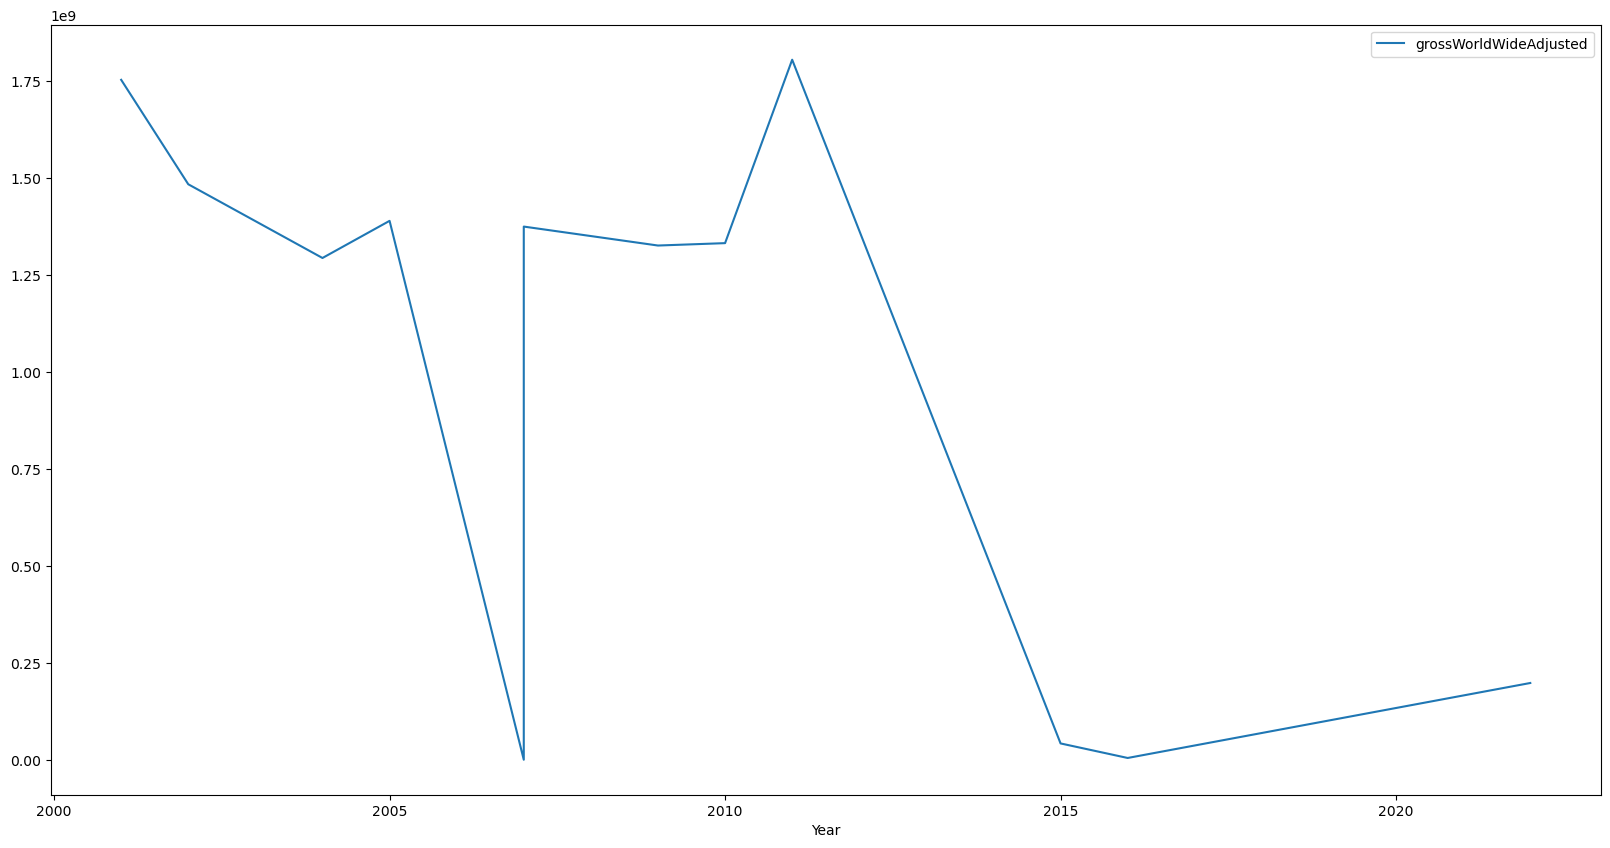

In [313]:
highest_grossing_actor_movies_df.plot(x = 'Year', y = 'grossWorldWideAdjusted', kind = 'line', figsize=(20, 10))

# Compare to Overall Movies Hist

In [301]:
df.sort_values(by='grossWorldWideAdjusted', ascending=False, inplace=True)
df.head(10)

,Title,Year,MPA,Rating,Votes,budget,grossWorldWide,gross_US_Canada,opening_weekend_Gross,directors,stars,wins,nominations,oscars,Profitability Ratio,grossWorldWideAdjusted
1933,Titanic,1997,PG-13,7.9,1.3M,200000000.0,2.264751e+09,674292608.0,28638131.0,['James Cameron'],"['Leonardo DiCaprio', 'Kate Winslet', 'Billy Z...",0,83,0,11.323753,4.265545e+09
4471,Avatar,2009,PG-13,7.9,1.4M,237000000.0,2.923706e+09,785221649.0,77025481.0,['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,131,0,12.336312,4.119764e+09
44,Star Wars: Episode IV - A New Hope,1977,PG,8.6,1.5M,11000000.0,7.753985e+08,460998507.0,1554475.0,['George Lucas'],"['Mark Hamill', 'Harrison Ford', 'Carrie Fisher']",0,30,0,70.490773,3.867495e+09
6306,Avengers: Endgame,2019,PG-13,8.4,1.3M,356000000.0,2.799439e+09,858373000.0,357115007.0,"['Anthony Russo', 'Joe Russo']","['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",0,133,1,7.863593,3.310695e+09
35,The Exorcist,1973,R,8.1,470K,11000000.0,4.308728e+08,233005644.0,8175666.0,['William Friedkin'],"['Ellen Burstyn', 'Max von Sydow', 'Linda Blair']",0,21,0,39.170252,2.932368e+09
39,Jaws,1975,PG,8.1,683K,7000000.0,4.772206e+08,266567580.0,7061513.0,['Steven Spielberg'],"['Roy Scheider', 'Robert Shaw', 'Richard Dreyf...",0,20,0,68.174369,2.680599e+09
5571,Star Wars: Episode VII - The Force Awakens,2015,PG-13,7.8,990K,245000000.0,2.071310e+09,936662225.0,247966675.0,['J.J. Abrams'],"['Daisy Ridley', 'John Boyega', 'Oscar Isaac']",0,140,5,8.454327,2.642350e+09
167,ET the Extra-Terrestrial,1982,PG,7.9,448K,10500000.0,7.973074e+08,439454989.0,11835389.0,['Steven Spielberg'],"['Henry Thomas', 'Drew Barrymore', 'Peter Coyo...",0,38,0,75.934039,2.497154e+09
6139,Avengers: Infinity War,2018,PG-13,8.4,1.3M,321000000.0,2.052415e+09,678815482.0,257698183.0,"['Anthony Russo', 'Joe Russo']","['Robert Downey Jr.', 'Chris Hemsworth', 'Mark...",0,81,1,6.393816,2.471247e+09
6590,Avatar: The Way of Water,2022,PG-13,7.5,521K,350000000.0,2.320250e+09,684075767.0,134100226.0,['James Cameron'],"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",0,152,0,6.629287,2.397390e+09


array([[<Axes: title={'center': 'grossWorldWideAdjusted'}>]], dtype=object)

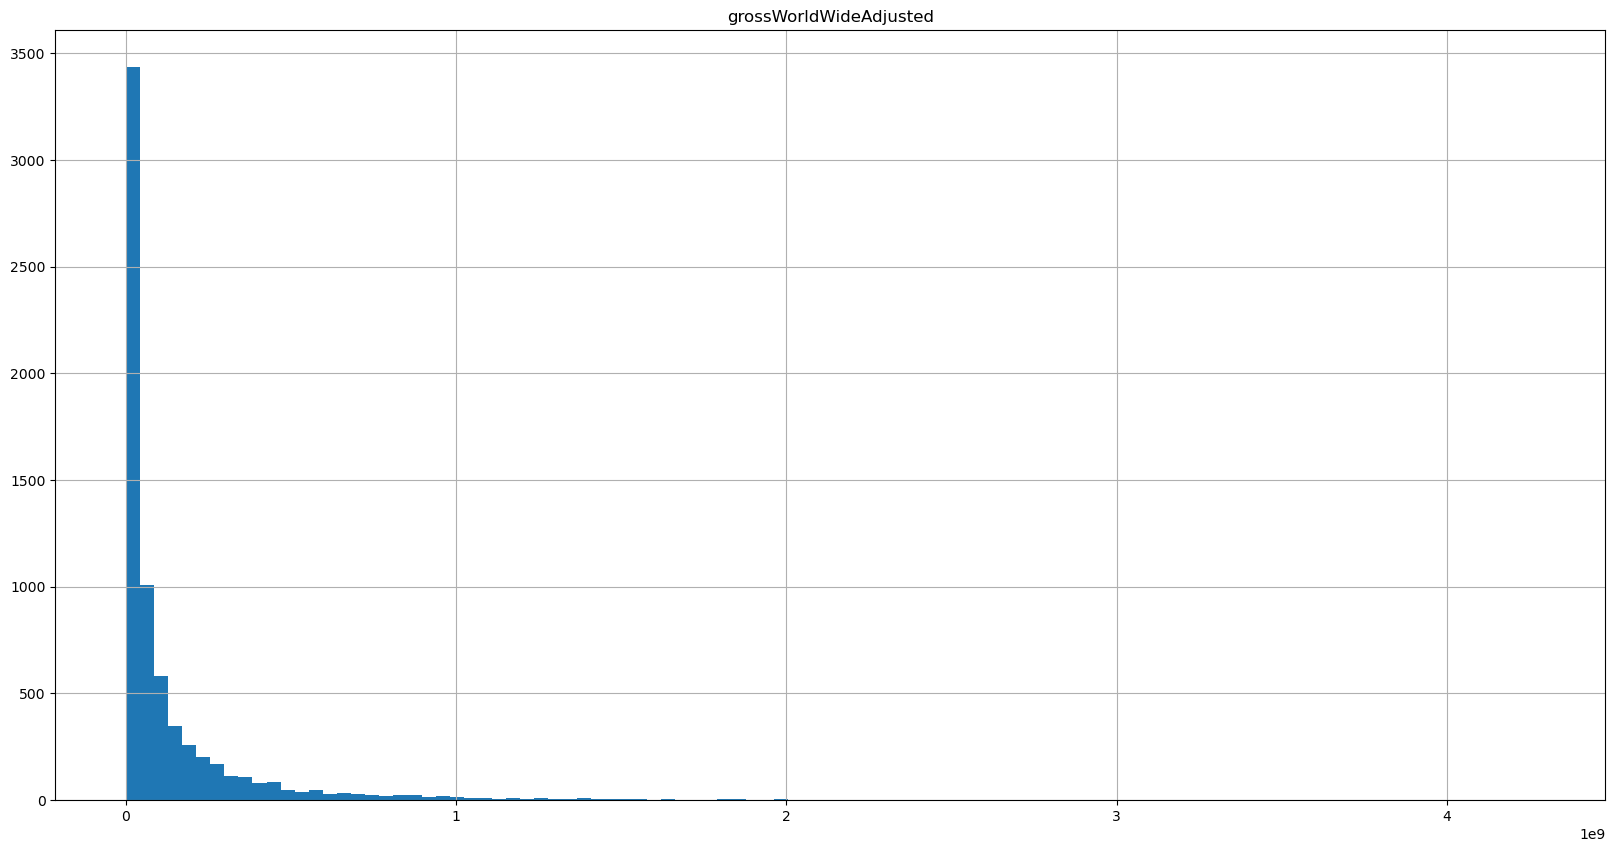

In [300]:
df.hist(column='grossWorldWideAdjusted', bins=100, figsize=(20, 10))